<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module3_IntroductionToClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Classification
Dani Bauer, 2022

In this tutorial, we introduce two ways to think about probabilistically modeling class data: (i) either as modeling the probability of belonging to a certain class $j$ conditionally on observing the features; or (ii) as modeling the probability of observing a certain combination of features conditional to belonging to class $j$.  

As always, let's start with importing the libraries:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import scale

## Two ways to think about class data

There are two ways of thinking about class data: (i) the probability of belonging to a certain class is a function of explanatoy variables; and (ii) the explanatory variables are drawn from different distributions depending on the class.  Note that the first approach is the basis for generalized linear/additive models (GLM/GAM) for classification whereas the second way underlies the Naive Bayes classifier.

### Review of Concepts I

Assume we are given predictors $X_i$ and outcome variables $Y_i \in \{1,2,...,M\}$.  Remember that we are trying to assess 
$$
p_j(x_0)= \mathbb{P}(Y=j|X=x_0).
$$
A sensible prediction is then the $j$ for given data $x_0$ such that $p_j(x_0)$ is the largest.  That's exactly the **Bayes classifier**.

For instance, let's assume that $X$ is two-dimensional consisting of height and weight, and that we attempt to predict sex $Y$ -- say 1 for male and 0 for females.  Hence, $p(x)=p_1(x)$ is the probability for a male given height and weight, and the probability of being female is $p_0(x)=1-p(x).$

One way is to guess a functional form for $p_j(x)$.  This is the idea behind **logistic regression**.  For instance, in our male female example we would have:
$$
\text{Proability Male} = p(\underbrace{\text{height},\text{weight}}_x)=\frac{e^{\beta_0+\beta_1\times\text{height}+\beta_2\times\text{weight}}}{1+e^{\beta_0+\beta_1\times\text{height}+\beta_2\times\text{weight}}}.
$$

Generalized Additive Models (GAMs) works similarly but allows for more general (non-linear) functions in the exponential. 

### Simulating a Class Data Set via Logistic Regression Approach


1. Let us simulate the covariates by sampling from a multivariate Normal distribution with expected height 66 inches and expected weight 175 lbs, and corresponding standard deviation 7 inches and 25 lbs, respectively.  We assume the correlation is 50%. 

In [2]:
np.random.seed = 1
sampsize = 100
mean = [66,175]
cov = [[7**2,0.5*7*25], [0.5*7*25, 25**2]]
X = np.random.multivariate_normal(mean, cov, sampsize)

2. Let us then assume that both height and weight are positively associated with being male.  More precisely, let's assume that the probability follows a logistic regression model with parameters $\beta_1$ and $\beta_2$ (which are just chosen arbitrarily).  The dependent variable ($Y$) then states whether the individual is male or not. 

In [3]:
beta_1 = 0.15
beta_2 = 0.03
probX = np.exp(beta_1 * (X[:,0] - 66) + beta_2 * (X[:,1] - 175))/(1+np.exp(beta_1 * (X[:,0] - 66) + beta_2 * (X[:,1] - 175)))
ISMALE = (probX > np.random.uniform(0,1,sampsize))
GenderDF1 = pd.DataFrame({'ISMALE':ISMALE,'HEIGHT': X[:,0], 'WEIGHT': X[:,1]})

3. Let us take a look at the data as a function of height and weight.

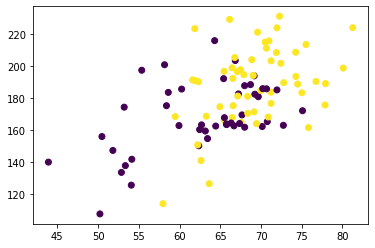

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X[:,0], X[:,1], c= ISMALE)

### Review of Concepts II

An alternative approach is to rely on Bayes theorem to express $p_j(x)$ in terms of the probability of observing $x$ given class $j$:
$$
p_j(x_0)=\frac{\pi_j\times f_j(x_0)}{\sum_k \pi_k\times f_k(x_0)},
$$
where $\pi_k$ are the (unconditional) proportions for the different classes.

For instance, in our gender example, it is proximate to assume $\pi_0=\pi_1=50\%,$ so that:
$$
p(x) = \frac{f_1(x)}{f_0(x)+f_1(x)},
$$
where $f_1(x)$ is the probability (density) for a given combination $x$ of height and weight given that the individual is a male and $f_0(x)$ is the probability for a given combination $x$ of height and weight given that the individual is a female.

In **Linear Discriminant Analysis (LDA)**, the assumption is that $f_j(x)$ is Normal with mean $\mu_j$ (and with a covariance matrix independent of the class), and we can determine the class-specific mean $\mu_j$ by calculating the sample average.  Given data $x_0$, we then choose the class $j_0$ that maximizes $p_j(x_0)$ among all classes $j.$  Naive Bayes works similar, but we allow for more general distributions -- with the caveat that the different feature components $x_{k}$ are assumed to be independent.

### Simulating a Class Data Set via drawing the (conditional) covariates

1. Let us consider simulating a dataset of males and females.  Here let's assume that we have 50 males and females (for a total sample size of 100), where we draw the height and weights for  males and females separately.  More precisely, we assume that males have expected height and weight of 72 inches and 190 lbs, respectively, whereas females have an expected height of 60 inches and an expected weight of 160 lbs.  We assume that the standard deviations are the same as in the previous example. 


In [5]:
halfsampsize = 50
mean_M = [72,190]
mean_F = [60,160]
cov = [[7**2,0.5*7*25], [0.5*7*25, 25**2]]
X_M = np.random.multivariate_normal(mean_M, cov, halfsampsize)
X_F = np.random.multivariate_normal(mean_F, cov, halfsampsize)
X = np.concatenate((X_M, X_F), axis=0)
ISMALE = np.concatenate((np.ones(halfsampsize,dtype=bool), np.zeros(halfsampsize,dtype=bool)))
GenderDF2 = pd.DataFrame({'ISMALE':ISMALE,'HEIGHT': X[:,0], 'WEIGHT': X[:,1]})

2. Let us take a look at the data as a function of height and weight.

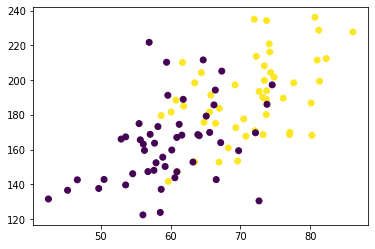

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X[:,0], X[:,1], c= ISMALE)

So the two data sets look similar.  

**Think before executing**:

* If we were to run logistic regression and LDA on the two datasets, which method do you expect to perform better on the two datasets?  

* Try it, i.e. compare logistic regression and LDA based on the simulated data sets.  

In [7]:
Train, Test = train_test_split(GenderDF1, test_size=0.5, random_state=1)

In [8]:
logistic_model1 = LogisticRegression(fit_intercept=True).fit(Train[['HEIGHT','WEIGHT']],Train['ISMALE'])
print(logistic_model1.intercept_)
print(logistic_model1.coef_)

[-13.50613417]
[[0.11621914 0.03405165]]


In [9]:
logistic_pred_1 = logistic_model1.predict(Test[['HEIGHT','WEIGHT']])
confusion_matrix(Test['ISMALE'],logistic_pred_1)

array([[16,  9],
       [ 4, 21]])

In [10]:
precision_score(Test['ISMALE'],logistic_pred_1)

0.7

In [ ]:
lda_model_1 = LinearDiscriminantAnalysis()
lda_model_1.fit(Train[['HEIGHT','WEIGHT']],Train['ISMALE'])
lda_pred_1 = lda_model_1.predict(Test[['HEIGHT','WEIGHT']])
confusion_matrix(Test['ISMALE'],lda_pred_1)

In [13]:
Train, Test = train_test_split(GenderDF2, test_size=0.5, random_state=1)
logistic_model2 = LogisticRegression(fit_intercept=True).fit(Train[['HEIGHT','WEIGHT']],Train['ISMALE'])
logistic_pred_2 = logistic_model1.predict(Test[['HEIGHT','WEIGHT']])
confusion_matrix(Test['ISMALE'],logistic_pred_2)

array([[20,  8],
       [ 4, 18]])

In [14]:
lda_model_2 = LinearDiscriminantAnalysis()
lda_model_2.fit(Train[['HEIGHT','WEIGHT']],Train['ISMALE'])
lda_pred_2 = lda_model_2.predict(Test[['HEIGHT','WEIGHT']])
confusion_matrix(Test['ISMALE'],lda_pred_2)

array([[21,  7],
       [ 3, 19]])

Generally, we expect the model to fit better that better describes the underlying data generating process, so logistic regression for the first and LDA for the second data set. Whether that comes out depends on randomness! Check by modifying the random seed!


## Application

Let's look at the real-world performance in a dataset from a [study by Caroline Davis](https://www.sciencedirect.com/science/article/pii/019566639090096Q) that has data on the height and weight of 200 individuals.

In [15]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 147 (delta 15), reused 0 (delta 0), pack-reused 117
Receiving objects: 100% (147/147), 23.32 MiB | 15.36 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (29/29), done.


In [16]:
hw_data = pd.read_csv('ML_656/Davis.csv')
hw_data.head()

,Unnamed: 0,sex,weight,height,reportedWeight,reportedHeight
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [17]:
hw_data['sex'] = pd.get_dummies(hw_data['sex'],drop_first=True)
hw_data.head()

,Unnamed: 0,sex,weight,height,reportedWeight,reportedHeight
0,1,1,77,182,77.0,180.0
1,2,0,58,161,51.0,159.0
2,3,0,53,161,54.0,158.0
3,4,1,68,177,70.0,175.0
4,5,0,59,157,59.0,155.0


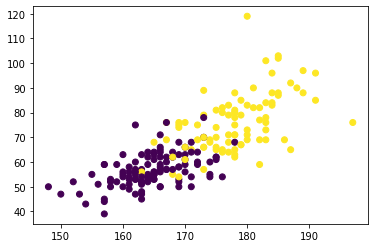

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(hw_data['height'], hw_data['weight'], c= hw_data['sex'])

In [19]:
Train, Test = train_test_split(hw_data, test_size=0.5, random_state=1)
logistic_model3 = LogisticRegression(fit_intercept=True).fit(Train[['height','weight']],Train['sex'])
logistic_pred_3 = logistic_model3.predict(Test[['height','weight']])
confusion_matrix(Test['sex'],logistic_pred_3)

array([[55,  5],
       [ 5, 35]])

In [20]:
lda_model_3 = LinearDiscriminantAnalysis()
lda_model_3.fit(Train[['height','weight']],Train['sex'])
lda_pred_3 = lda_model_3.predict(Test[['height','weight']])
confusion_matrix(Test['sex'],lda_pred_3)

array([[57,  3],
       [ 5, 35]])

So the performance is quite similar, which is no surprise given the similarity.